Dataset Link
https://www.kaggle.com/vkrahul/hate-speech-analysis/data

# Import libraries

In [0]:
import numpy as np 
import pandas as pd
from functions import *
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from prettytable import PrettyTable
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter 
from sklearn.metrics import confusion_matrix 

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Import dataset

In [0]:
train = pd.read_csv("train_E6oV3lV.csv")

## dataset info

classwise distribution of dataset                                          
class 0 represents non hate speech                                         
class 1 represents hate speech

In [0]:
print(Counter(train['label']))

Counter({0: 29720, 1: 2242})


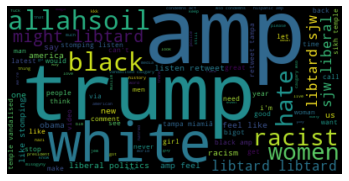

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

text = ""
for i in train[train["label"]==1]["tweet"].values:
  text = text + i

stop_words = list(stopwords.words('english'))
stop_words.append('user')
wordcloud = WordCloud(stopwords=stop_words).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Top 10 words in hate speech

In [0]:

# Create a list of tuples sorted by index 1 i.e. value field     
listofTuples = sorted(wordcloud.words_.items() , reverse=True, key=lambda x: x[1])
 
# Iterate over the sorted sequence
count = 0
for elem in listofTuples :
    if(count > 10):
      break
    print(elem[0])
    count = count+1   

amp
trump
white
allahsoil
black
racist
hate
women
might libtard
libtard libtard
libtard sjw


sample tweet in class 0

In [0]:
train[train["label"]==0]["tweet"].values[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

Sample tweet in class 1

In [0]:
train[train["label"]==1]["tweet"].values[0]

"@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  "

#lemmatize tweets and split into train/test data

In [0]:
train['label'] = train['label'].astype('category')

train.info()

train['text_token'] = [''.join(re.sub('[^A-Za-z]',' ',text) for text in lis) for lis in train['tweet']]
# test['text_lem'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]',' ',text)) for text in lis]) for lis in test['tweet']]

X_train,X_test,y_train,y_test = train_test_split(train['text_token'],train['label'],test_size=0.2,stratify = train['label'],random_state=345)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      31962 non-null  int64   
 1   label   31962 non-null  category
 2   tweet   31962 non-null  object  
dtypes: category(1), int64(1), object(1)
memory usage: 530.8+ KB


In [0]:
print(Counter(y_train.values)),print(Counter(y_test.values))

Counter({0: 23775, 1: 1794})
Counter({0: 5945, 1: 448})


(None, None)

Initialize tfidf and bag of word vectorizer

In [0]:
tfidf = TfidfVectorizer(ngram_range = (1,4)).fit(X_train)
bow = CountVectorizer(min_df=2,lowercase=True)

we only fit both vectorizer on training data to make same vocabulary for both training and testing which makes the shape of training and testing same

In [0]:
X_train_bow= bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [0]:
print(X_train_tfidf[0].todense().shape)

(1, 588381)


In [0]:
print(X_train_bow[0].todense().shape)

(1, 12514)


initialize prettytable to store our required output

In [0]:
table = PrettyTable() 
table.field_names = ['Model','F1_score','Accuracy']

#intialize & fit model , predict data
using `SVC`,`Logistic Regression` and `Random Forest` machine learning model
with default parameters

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
def plt_confusion_matrix(y_train,y_pred):
    df_cm = pd.DataFrame(confusion_matrix(y_train,y_pred), range(2), range(2))
    # plt.figure(figsize=(10,7))
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 8},fmt='g') # font size
    plt.xlabel('Actual classes')
    plt.ylabel('Predicted classes')
    plt.show()

..Training SVM model
..SVM Training Done
for svm tfidf


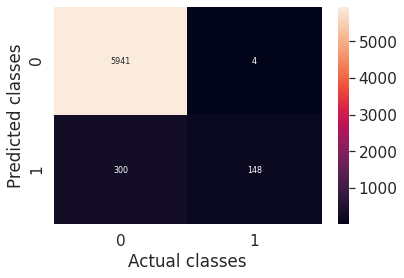

for svm bow


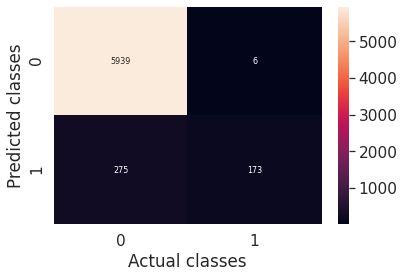

..Training LogisticRegression


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


..LR Training Done
for logistic-regression tfidf


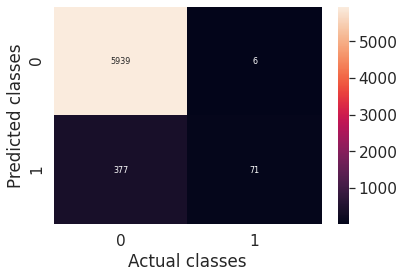

for logistic-regression bow


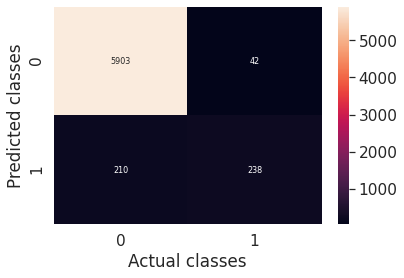

..Training RF
..RF Training Done
for random forest tfidf


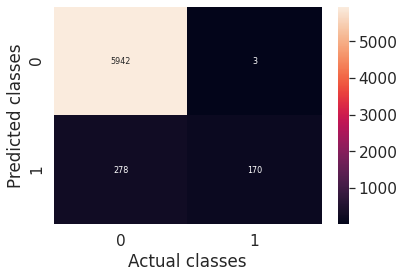

for random forest bow


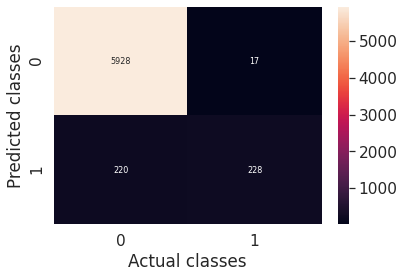

+-----------+--------------------+--------------------+
|   Model   |      F1_score      |      Accuracy      |
+-----------+--------------------+--------------------+
| SVM-tfidf | 0.4933333333333333 | 0.9524479899890506 |
|  SVM-bow  | 0.5518341307814992 | 0.9560456749569842 |
|  LR-tfidf | 0.2704761904761905 | 0.9400907242296261 |
|   LR-bow  | 0.6538461538461537 | 0.9605818864382919 |
|  RF-tfidf | 0.5475040257648953 | 0.9560456749569842 |
|  RF-tfidf | 0.658008658008658  | 0.9629282027217269 |
+-----------+--------------------+--------------------+


In [0]:
print("..Training SVM model")
clf1 = SVC(random_state=345).fit(X_train_tfidf,y_train)                                   #fit SVC on tfidf vector
clf2 = SVC(random_state=345).fit(X_train_bow,y_train)                                     #fit SVC on bag of word vector
print("..SVM Training Done")

y_pred = clf1.predict(X_test_tfidf)                                                       #predict using SVC on tfidf vector
print("for svm tfidf")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(['SVM-tfidf',f1_score(y_test,y_pred),clf1.score(X_test_tfidf,y_test)])
y_pred = clf2.predict(X_test_bow)                                                         #predict using SVC on bag of word vector
print("for svm bow")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(['SVM-bow',f1_score(y_test,y_pred),clf2.score(X_test_bow,y_test)])

print("..Training LogisticRegression")
clf1 = LogisticRegression(random_state=345).fit(X_train_tfidf,y_train)                     #fit logistic regression on tfidf vector
clf2 = LogisticRegression(random_state=345).fit(X_train_bow,y_train)                       #fit logistic regression on bag of words vector
print("..LR Training Done")

y_pred = clf1.predict(X_test_tfidf)                                                        #predict using logistic regression on tfidf vector
print("for logistic-regression tfidf")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(['LR-tfidf',f1_score(y_test,y_pred),clf1.score(X_test_tfidf,y_test)])

y_pred = clf2.predict(X_test_bow)                                                          #predict using logistic regression on bag of words vector
print("for logistic-regression bow")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(['LR-bow',f1_score(y_test,y_pred),clf2.score(X_test_bow,y_test)])

print("..Training RF")
clf1 = RandomForestClassifier(random_state=345).fit(X_train_tfidf,y_train)                  #fit random forest on tfidf vector
clf2 = RandomForestClassifier(random_state=345).fit(X_train_bow,y_train)                    #fit random forest on bag of word vector
print("..RF Training Done")

y_pred = clf1.predict(X_test_tfidf)                                                         #predict using random forest on tfidf vector
print("for random forest tfidf")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(["RF-tfidf",f1_score(y_test,y_pred),clf1.score(X_test_tfidf,y_test)])

y_pred = clf2.predict(X_test_bow)                                                           #preedict using random forest on bag of words vector
print("for random forest bow")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(["RF-tfidf",f1_score(y_test,y_pred),clf2.score(X_test_bow,y_test)])

print(table)

from above table we can conclude that Random forest shows best performance with bag of word vector

lets use some preprocessing to and evaluate the performance

#using preprocessing

##`process`
function replaces contracted word with its decontracted form and then removes the stopwords

In [0]:
X_train_processed=process(X_train.values)

100%|██████████| 25569/25569 [00:39<00:00, 645.74it/s]


In [0]:
X_test_proccessed=process(X_test.values)

100%|██████████| 6393/6393 [00:09<00:00, 658.53it/s]


##`stemming` 
used for stemming

In [0]:
X_train_stem = stemming(X_train_processed)
X_test_stem = stemming(X_test_proccessed)

intialize tfidf vector and  bag of word vector as done above

In [0]:
tfidf = TfidfVectorizer(ngram_range = (1,4)).fit(X_train_stem)
bow = CountVectorizer(min_df=2,lowercase=True)

X_train_bow= bow.fit_transform(X_train_stem)
X_test_bow = bow.transform(X_test_stem)

X_train_tfidf = tfidf.transform(X_train_stem)
X_test_tfidf = tfidf.transform(X_test_stem)

In [0]:
X_train_tfidf[0].todense().shape, X_train_bow[0].todense().shape

((1, 402289), (1, 10013))

In [0]:
table = PrettyTable() 
table.field_names = ['Model','best_param','F1_score','Accuracy']
scorer = make_scorer(f1_score, greater_is_better=True)

##`gridsearch`
used to obtain best parameter                                              
here `F1 score` is used as score as there is large class imbalance it is easy obtain high accuracy, so to get best parameter F1 score is used       

Formula for F1 score                                                      
F1 Score = 2*((precision*recall)/(precision+recall))

###`SVC`

Fitting 2 folds for each of 13 candidates, totalling 26 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, kernel=linear, score=(train=0.971, test=0.419), total=  56.8s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV]  C=1, kernel=linear, score=(train=0.975, test=0.413), total=  56.2s
[CV] C=2, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV]  C=2, kernel=linear, score=(train=0.998, test=0.477), total= 1.1min
[CV] C=2, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.8min remaining:    0.0s


[CV]  C=2, kernel=linear, score=(train=0.999, test=0.488), total= 1.1min
[CV] C=20, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.1min remaining:    0.0s


[CV]  C=20, kernel=linear, score=(train=0.999, test=0.470), total= 1.0min
[CV] C=20, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.4min remaining:    0.0s


[CV]  C=20, kernel=linear, score=(train=0.999, test=0.487), total= 1.0min
[CV] C=30, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.7min remaining:    0.0s


[CV]  C=30, kernel=linear, score=(train=0.999, test=0.466), total=  57.1s
[CV] C=30, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  8.9min remaining:    0.0s


[CV]  C=30, kernel=linear, score=(train=0.999, test=0.484), total= 1.0min
[CV] C=40, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 10.2min remaining:    0.0s


[CV]  C=40, kernel=linear, score=(train=0.999, test=0.459), total=  55.6s
[CV] C=40, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.3min remaining:    0.0s


[CV]  C=40, kernel=linear, score=(train=0.999, test=0.482), total= 1.0min
[CV] C=50, kernel=linear .............................................
[CV]  C=50, kernel=linear, score=(train=0.999, test=0.458), total=  57.5s
[CV] C=50, kernel=linear .............................................
[CV]  C=50, kernel=linear, score=(train=0.999, test=0.482), total=  59.8s
[CV] C=100, kernel=linear ............................................
[CV]  C=100, kernel=linear, score=(train=0.999, test=0.457), total=  55.7s
[CV] C=100, kernel=linear ............................................
[CV]  C=100, kernel=linear, score=(train=0.999, test=0.476), total=  53.4s
[CV] C=130, kernel=linear ............................................
[CV]  C=130, kernel=linear, score=(train=0.999, test=0.457), total=  55.3s
[CV] C=130, kernel=linear ............................................
[CV]  C=130, kernel=linear, score=(train=0.999, test=0.474), total=  52.4s
[CV] C=160, kernel=linear ..........................

[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed: 30.6min finished


best parameters: {'C': 2, 'kernel': 'linear'}
..tfidf done
for svm tfidf


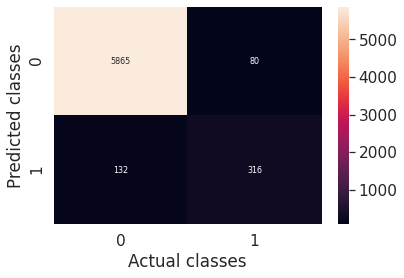

Fitting 2 folds for each of 13 candidates, totalling 26 fits
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, kernel=linear, score=(train=0.955, test=0.621), total=   6.3s
[CV] C=1, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


[CV]  C=1, kernel=linear, score=(train=0.963, test=0.615), total=   6.3s
[CV] C=2, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.0s remaining:    0.0s


[CV]  C=2, kernel=linear, score=(train=0.976, test=0.618), total=   6.8s
[CV] C=2, kernel=linear ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.0s remaining:    0.0s


[CV]  C=2, kernel=linear, score=(train=0.981, test=0.604), total=   6.2s
[CV] C=20, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.4s remaining:    0.0s


[CV]  C=20, kernel=linear, score=(train=0.992, test=0.540), total=   6.7s
[CV] C=20, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   43.0s remaining:    0.0s


[CV]  C=20, kernel=linear, score=(train=0.998, test=0.560), total=   6.2s
[CV] C=30, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   51.2s remaining:    0.0s


[CV]  C=30, kernel=linear, score=(train=0.993, test=0.524), total=   6.8s
[CV] C=30, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   59.9s remaining:    0.0s


[CV]  C=30, kernel=linear, score=(train=0.998, test=0.553), total=   6.4s
[CV] C=40, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.1min remaining:    0.0s


[CV]  C=40, kernel=linear, score=(train=0.993, test=0.518), total=   6.8s
[CV] C=40, kernel=linear .............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s


[CV]  C=40, kernel=linear, score=(train=0.999, test=0.550), total=   6.4s
[CV] C=50, kernel=linear .............................................
[CV]  C=50, kernel=linear, score=(train=0.993, test=0.511), total=   6.7s
[CV] C=50, kernel=linear .............................................
[CV]  C=50, kernel=linear, score=(train=0.999, test=0.550), total=   6.3s
[CV] C=100, kernel=linear ............................................
[CV]  C=100, kernel=linear, score=(train=0.997, test=0.495), total=   6.8s
[CV] C=100, kernel=linear ............................................
[CV]  C=100, kernel=linear, score=(train=0.999, test=0.548), total=   7.1s
[CV] C=130, kernel=linear ............................................
[CV]  C=130, kernel=linear, score=(train=0.998, test=0.488), total=   7.4s
[CV] C=130, kernel=linear ............................................
[CV]  C=130, kernel=linear, score=(train=0.999, test=0.546), total=   7.0s
[CV] C=160, kernel=linear ..........................

[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:  4.0min finished


best parameters: {'C': 1, 'kernel': 'linear'}
for svm bow


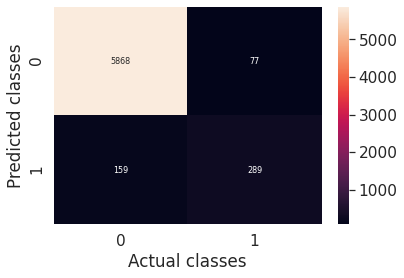

+------------------+------------------------------+--------------------+--------------------+
|      Model       |          best_param          |      F1_score      |      Accuracy      |
+------------------+------------------------------+--------------------+--------------------+
| linear-svm-tfidf | {'C': 2, 'kernel': 'linear'} | 0.7488151658767774 | 0.9668387298607852 |
|  linear-svm-bow  | {'C': 1, 'kernel': 'linear'} | 0.7100737100737101 | 0.9630846238072892 |
+------------------+------------------------------+--------------------+--------------------+


In [0]:

grid = {"C":[1,2,20,30,40,50,100,130,160,200,300,350,400],"kernel":['linear']}

clf_svm1=SVC(random_state=345)
clf_svm2=SVC(random_state=345)

#tfidf
rf_cv=gridsearch(X_train_tfidf,y_train,clf_svm1,grid,scorer)
params=rf_cv.best_params_
clf_svm = SVC(random_state=345,kernel=params['kernel'],C=params['C']).fit(X_train_tfidf,y_train)
print("..tfidf done")
y_pred = clf_svm.predict(X_test_tfidf)
print("for svm tfidf")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(['linear-svm-tfidf',rf_cv.best_params_,f1_score(y_test,y_pred),clf_svm.score(X_test_tfidf,y_test)])

#bow
rf_cv=gridsearch(X_train_bow,y_train,clf_svm2,grid,scorer)
params=rf_cv.best_params_
clf_svm = SVC(random_state=345,kernel=params['kernel'],C=params['C']).fit(X_train_bow,y_train)
y_pred = clf_svm.predict(X_test_bow)
print("for svm bow")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(['linear-svm-bow',rf_cv.best_params_,f1_score(y_test,y_pred),clf_svm.score(X_test_bow,y_test)])
print(table)

###`logistic regression`

Fitting 2 folds for each of 168 candidates, totalling 336 fits
[CV] C=0.5, max_iter=50 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.5, max_iter=50, score=(train=0.141, test=0.125), total=   2.1s
[CV] C=0.5, max_iter=50 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  C=0.5, max_iter=50, score=(train=0.110, test=0.104), total=   2.4s
[CV] C=0.5, max_iter=100 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV]  C=0.5, max_iter=100, score=(train=0.141, test=0.125), total=   2.1s
[CV] C=0.5, max_iter=100 .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s remaining:    0.0s


[CV]  C=0.5, max_iter=100, score=(train=0.110, test=0.104), total=   2.3s
[CV] C=0.5, max_iter=150 .............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.9s remaining:    0.0s


[CV]  C=0.5, max_iter=150, score=(train=0.141, test=0.125), total=   2.1s
[CV] C=0.5, max_iter=150 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.0s remaining:    0.0s


[CV]  C=0.5, max_iter=150, score=(train=0.110, test=0.104), total=   2.4s
[CV] C=0.5, max_iter=200 .............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.4s remaining:    0.0s


[CV]  C=0.5, max_iter=200, score=(train=0.141, test=0.125), total=   2.1s
[CV] C=0.5, max_iter=200 .............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.5s remaining:    0.0s


[CV]  C=0.5, max_iter=200, score=(train=0.110, test=0.104), total=   2.3s
[CV] C=0.5, max_iter=250 .............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.9s remaining:    0.0s


[CV]  C=0.5, max_iter=250, score=(train=0.141, test=0.125), total=   2.1s
[CV] C=0.5, max_iter=250 .............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   20.0s remaining:    0.0s


[CV]  C=0.5, max_iter=250, score=(train=0.110, test=0.104), total=   2.3s
[CV] C=0.5, max_iter=300 .............................................
[CV]  C=0.5, max_iter=300, score=(train=0.141, test=0.125), total=   2.1s
[CV] C=0.5, max_iter=300 .............................................
[CV]  C=0.5, max_iter=300, score=(train=0.110, test=0.104), total=   2.3s
[CV] C=0.5, max_iter=350 .............................................
[CV]  C=0.5, max_iter=350, score=(train=0.141, test=0.125), total=   2.1s
[CV] C=0.5, max_iter=350 .............................................
[CV]  C=0.5, max_iter=350, score=(train=0.110, test=0.104), total=   2.3s
[CV] C=0.5, max_iter=400 .............................................
[CV]  C=0.5, max_iter=400, score=(train=0.141, test=0.125), total=   2.1s
[CV] C=0.5, max_iter=400 .............................................
[CV]  C=0.5, max_iter=400, score=(train=0.110, test=0.104), total=   2.4s
[CV] C=1, max_iter=50 ..................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=50, score=(train=0.195, test=0.179), total=   3.2s
[CV] C=1, max_iter=50 ................................................
[CV]  C=1, max_iter=50, score=(train=0.186, test=0.186), total=   2.7s
[CV] C=1, max_iter=100 ...............................................
[CV]  C=1, max_iter=100, score=(train=0.195, test=0.179), total=   3.3s
[CV] C=1, max_iter=100 ...............................................
[CV]  C=1, max_iter=100, score=(train=0.186, test=0.186), total=   2.6s
[CV] C=1, max_iter=150 ...............................................
[CV]  C=1, max_iter=150, score=(train=0.195, test=0.179), total=   3.3s
[CV] C=1, max_iter=150 ...............................................
[CV]  C=1, max_iter=150, score=(train=0.186, test=0.186), total=   2.6s
[CV] C=1, max_iter=200 ...............................................
[CV]  C=1, max_iter=200, score=(train=0.195, test=0.179), total=   3.3s
[CV] C=1, max_iter=200 ...............................................
[

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=2, max_iter=50, score=(train=0.321, test=0.222), total=   3.2s
[CV] C=2, max_iter=50 ................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=2, max_iter=50, score=(train=0.323, test=0.221), total=   3.2s
[CV] C=2, max_iter=100 ...............................................
[CV]  C=2, max_iter=100, score=(train=0.321, test=0.222), total=   3.9s
[CV] C=2, max_iter=100 ...............................................
[CV]  C=2, max_iter=100, score=(train=0.323, test=0.221), total=   3.2s
[CV] C=2, max_iter=150 ...............................................
[CV]  C=2, max_iter=150, score=(train=0.321, test=0.222), total=   4.0s
[CV] C=2, max_iter=150 ...............................................
[CV]  C=2, max_iter=150, score=(train=0.323, test=0.221), total=   3.2s
[CV] C=2, max_iter=200 ...............................................
[CV]  C=2, max_iter=200, score=(train=0.321, test=0.222), total=   4.0s
[CV] C=2, max_iter=200 ...............................................
[CV]  C=2, max_iter=200, score=(train=0.323, test=0.221), total=   3.1s
[CV] C=2, max_iter=250 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=4, max_iter=50, score=(train=0.703, test=0.279), total=   3.2s
[CV] C=4, max_iter=50 ................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=4, max_iter=50, score=(train=0.695, test=0.305), total=   3.1s
[CV] C=4, max_iter=100 ...............................................
[CV]  C=4, max_iter=100, score=(train=0.703, test=0.279), total=   4.2s
[CV] C=4, max_iter=100 ...............................................
[CV]  C=4, max_iter=100, score=(train=0.699, test=0.305), total=   4.7s
[CV] C=4, max_iter=150 ...............................................
[CV]  C=4, max_iter=150, score=(train=0.703, test=0.279), total=   4.2s
[CV] C=4, max_iter=150 ...............................................
[CV]  C=4, max_iter=150, score=(train=0.699, test=0.305), total=   4.7s
[CV] C=4, max_iter=200 ...............................................
[CV]  C=4, max_iter=200, score=(train=0.703, test=0.279), total=   4.2s
[CV] C=4, max_iter=200 ...............................................
[CV]  C=4, max_iter=200, score=(train=0.699, test=0.305), total=   4.7s
[CV] C=4, max_iter=250 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=50, score=(train=0.997, test=0.375), total=   3.2s
[CV] C=10, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=50, score=(train=0.998, test=0.389), total=   3.2s
[CV] C=10, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=100, score=(train=0.997, test=0.374), total=   6.3s
[CV] C=10, max_iter=100 ..............................................
[CV]  C=10, max_iter=100, score=(train=0.999, test=0.390), total=   6.0s
[CV] C=10, max_iter=150 ..............................................
[CV]  C=10, max_iter=150, score=(train=0.997, test=0.374), total=   6.7s
[CV] C=10, max_iter=150 ..............................................
[CV]  C=10, max_iter=150, score=(train=0.999, test=0.390), total=   5.9s
[CV] C=10, max_iter=200 ..............................................
[CV]  C=10, max_iter=200, score=(train=0.997, test=0.374), total=   6.7s
[CV] C=10, max_iter=200 ..............................................
[CV]  C=10, max_iter=200, score=(train=0.999, test=0.390), total=   5.9s
[CV] C=10, max_iter=250 ..............................................
[CV]  C=10, max_iter=250, score=(train=0.997, test=0.374), total=   6.7s
[CV] C=10, max_iter=250 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=50, score=(train=0.999, test=0.390), total=   3.2s
[CV] C=20, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=50, score=(train=0.999, test=0.411), total=   3.2s
[CV] C=20, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=100, score=(train=0.999, test=0.394), total=   6.3s
[CV] C=20, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=100, score=(train=0.999, test=0.410), total=   6.4s
[CV] C=20, max_iter=150 ..............................................
[CV]  C=20, max_iter=150, score=(train=0.999, test=0.394), total=   8.1s
[CV] C=20, max_iter=150 ..............................................
[CV]  C=20, max_iter=150, score=(train=0.999, test=0.410), total=   6.8s
[CV] C=20, max_iter=200 ..............................................
[CV]  C=20, max_iter=200, score=(train=0.999, test=0.394), total=   8.1s
[CV] C=20, max_iter=200 ..............................................
[CV]  C=20, max_iter=200, score=(train=0.999, test=0.410), total=   6.9s
[CV] C=20, max_iter=250 ..............................................
[CV]  C=20, max_iter=250, score=(train=0.999, test=0.394), total=   8.0s
[CV] C=20, max_iter=250 ..............................................
[CV]  C=20, max_iter=250, score=(train=0.999, test=0.410), total=   6.9s
[CV] C=20, max_iter=300 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=50, score=(train=0.999, test=0.395), total=   3.2s
[CV] C=30, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=50, score=(train=0.999, test=0.414), total=   3.4s
[CV] C=30, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=100, score=(train=0.999, test=0.395), total=   6.4s
[CV] C=30, max_iter=100 ..............................................
[CV]  C=30, max_iter=100, score=(train=0.999, test=0.414), total=   5.9s
[CV] C=30, max_iter=150 ..............................................
[CV]  C=30, max_iter=150, score=(train=0.999, test=0.395), total=   8.3s
[CV] C=30, max_iter=150 ..............................................
[CV]  C=30, max_iter=150, score=(train=0.999, test=0.414), total=   5.9s
[CV] C=30, max_iter=200 ..............................................
[CV]  C=30, max_iter=200, score=(train=0.999, test=0.395), total=   8.3s
[CV] C=30, max_iter=200 ..............................................
[CV]  C=30, max_iter=200, score=(train=0.999, test=0.414), total=   5.9s
[CV] C=30, max_iter=250 ..............................................
[CV]  C=30, max_iter=250, score=(train=0.999, test=0.395), total=   8.3s
[CV] C=30, max_iter=250 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=50, score=(train=0.999, test=0.396), total=   3.2s
[CV] C=40, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=50, score=(train=0.999, test=0.418), total=   3.2s
[CV] C=40, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=100, score=(train=0.999, test=0.397), total=   6.3s
[CV] C=40, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=100, score=(train=0.999, test=0.418), total=   6.3s
[CV] C=40, max_iter=150 ..............................................
[CV]  C=40, max_iter=150, score=(train=0.999, test=0.397), total=   8.3s
[CV] C=40, max_iter=150 ..............................................
[CV]  C=40, max_iter=150, score=(train=0.999, test=0.418), total=   6.6s
[CV] C=40, max_iter=200 ..............................................
[CV]  C=40, max_iter=200, score=(train=0.999, test=0.397), total=   8.3s
[CV] C=40, max_iter=200 ..............................................
[CV]  C=40, max_iter=200, score=(train=0.999, test=0.418), total=   6.5s
[CV] C=40, max_iter=250 ..............................................
[CV]  C=40, max_iter=250, score=(train=0.999, test=0.397), total=   8.3s
[CV] C=40, max_iter=250 ..............................................
[CV]  C=40, max_iter=250, score=(train=0.999, test=0.418), total=   6.6s
[CV] C=40, max_iter=300 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=50, score=(train=0.999, test=0.400), total=   3.1s
[CV] C=50, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=50, score=(train=0.999, test=0.418), total=   3.1s
[CV] C=50, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=100, score=(train=0.999, test=0.398), total=   6.3s
[CV] C=50, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=100, score=(train=0.999, test=0.418), total=   6.3s
[CV] C=50, max_iter=150 ..............................................
[CV]  C=50, max_iter=150, score=(train=0.999, test=0.398), total=   8.5s
[CV] C=50, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=150, score=(train=0.999, test=0.418), total=   9.3s
[CV] C=50, max_iter=200 ..............................................
[CV]  C=50, max_iter=200, score=(train=0.999, test=0.398), total=   8.5s
[CV] C=50, max_iter=200 ..............................................
[CV]  C=50, max_iter=200, score=(train=0.999, test=0.418), total=   9.4s
[CV] C=50, max_iter=250 ..............................................
[CV]  C=50, max_iter=250, score=(train=0.999, test=0.398), total=   8.4s
[CV] C=50, max_iter=250 ..............................................
[CV]  C=50, max_iter=250, score=(train=0.999, test=0.418), total=   9.3s
[CV] C=50, max_iter=300 ..............................................
[CV]  C=50, max_iter=300, score=(train=0.999, test=0.398), total=   8.4s
[CV] C=50, max_iter=300 ..............................................
[CV]  C=50, max_iter=300, score=(train=0.999, test=0.418), total=   9.4s
[CV] C=50, max_iter=350 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=50, score=(train=0.999, test=0.403), total=   3.1s
[CV] C=70, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=50, score=(train=0.999, test=0.420), total=   3.2s
[CV] C=70, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=100, score=(train=0.999, test=0.404), total=   6.2s
[CV] C=70, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=100, score=(train=0.999, test=0.421), total=   6.4s
[CV] C=70, max_iter=150 ..............................................
[CV]  C=70, max_iter=150, score=(train=0.999, test=0.404), total=   9.3s
[CV] C=70, max_iter=150 ..............................................
[CV]  C=70, max_iter=150, score=(train=0.999, test=0.422), total=   9.0s
[CV] C=70, max_iter=200 ..............................................
[CV]  C=70, max_iter=200, score=(train=0.999, test=0.404), total=   9.3s
[CV] C=70, max_iter=200 ..............................................
[CV]  C=70, max_iter=200, score=(train=0.999, test=0.422), total=   9.1s
[CV] C=70, max_iter=250 ..............................................
[CV]  C=70, max_iter=250, score=(train=0.999, test=0.404), total=   9.3s
[CV] C=70, max_iter=250 ..............................................
[CV]  C=70, max_iter=250, score=(train=0.999, test=0.422), total=   9.0s
[CV] C=70, max_iter=300 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=50, score=(train=0.999, test=0.406), total=   3.1s
[CV] C=80, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=50, score=(train=0.999, test=0.435), total=   3.1s
[CV] C=80, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=100, score=(train=0.999, test=0.406), total=   6.3s
[CV] C=80, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=100, score=(train=0.999, test=0.425), total=   6.3s
[CV] C=80, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=150, score=(train=0.999, test=0.406), total=   9.3s
[CV] C=80, max_iter=150 ..............................................
[CV]  C=80, max_iter=150, score=(train=0.999, test=0.425), total=   8.9s
[CV] C=80, max_iter=200 ..............................................
[CV]  C=80, max_iter=200, score=(train=0.999, test=0.406), total=   9.6s
[CV] C=80, max_iter=200 ..............................................
[CV]  C=80, max_iter=200, score=(train=0.999, test=0.425), total=   8.8s
[CV] C=80, max_iter=250 ..............................................
[CV]  C=80, max_iter=250, score=(train=0.999, test=0.406), total=   9.6s
[CV] C=80, max_iter=250 ..............................................
[CV]  C=80, max_iter=250, score=(train=0.999, test=0.425), total=   8.9s
[CV] C=80, max_iter=300 ..............................................
[CV]  C=80, max_iter=300, score=(train=0.999, test=0.406), total=   9.6s
[CV] C=80, max_iter=300 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=50, score=(train=0.999, test=0.410), total=   3.1s
[CV] C=100, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=50, score=(train=0.999, test=0.425), total=   3.1s
[CV] C=100, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=100, score=(train=0.999, test=0.411), total=   6.3s
[CV] C=100, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=100, score=(train=0.999, test=0.426), total=   6.3s
[CV] C=100, max_iter=150 .............................................
[CV]  C=100, max_iter=150, score=(train=0.999, test=0.411), total=   8.7s
[CV] C=100, max_iter=150 .............................................
[CV]  C=100, max_iter=150, score=(train=0.999, test=0.426), total=   8.7s
[CV] C=100, max_iter=200 .............................................
[CV]  C=100, max_iter=200, score=(train=0.999, test=0.411), total=   8.8s
[CV] C=100, max_iter=200 .............................................
[CV]  C=100, max_iter=200, score=(train=0.999, test=0.426), total=   8.8s
[CV] C=100, max_iter=250 .............................................
[CV]  C=100, max_iter=250, score=(train=0.999, test=0.411), total=   8.9s
[CV] C=100, max_iter=250 .............................................
[CV]  C=100, max_iter=250, score=(train=0.999, test=0.426), total=   8.7s
[CV] C=100, max_iter=300 ...............................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=50, score=(train=0.999, test=0.407), total=   3.2s
[CV] C=130, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=50, score=(train=0.999, test=0.430), total=   3.1s
[CV] C=130, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=100, score=(train=0.999, test=0.414), total=   6.5s
[CV] C=130, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=100, score=(train=0.999, test=0.431), total=   6.3s
[CV] C=130, max_iter=150 .............................................
[CV]  C=130, max_iter=150, score=(train=0.999, test=0.414), total=   8.8s
[CV] C=130, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=150, score=(train=0.999, test=0.431), total=   9.5s
[CV] C=130, max_iter=200 .............................................
[CV]  C=130, max_iter=200, score=(train=0.999, test=0.414), total=   8.8s
[CV] C=130, max_iter=200 .............................................
[CV]  C=130, max_iter=200, score=(train=0.999, test=0.431), total=   9.7s
[CV] C=130, max_iter=250 .............................................
[CV]  C=130, max_iter=250, score=(train=0.999, test=0.414), total=   8.8s
[CV] C=130, max_iter=250 .............................................
[CV]  C=130, max_iter=250, score=(train=0.999, test=0.431), total=   9.7s
[CV] C=130, max_iter=300 .............................................
[CV]  C=130, max_iter=300, score=(train=0.999, test=0.414), total=   8.8s
[CV] C=130, max_iter=300 .............................................
[CV]  C=130, max_iter=300, score=(train=0.999, test=0.431), total=   9.7s
[CV] C=130, max_iter=350 ...............................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=50, score=(train=0.999, test=0.414), total=   3.2s
[CV] C=160, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=50, score=(train=0.999, test=0.441), total=   3.1s
[CV] C=160, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=100, score=(train=0.999, test=0.415), total=   6.3s
[CV] C=160, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=100, score=(train=0.999, test=0.437), total=   6.2s
[CV] C=160, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=150, score=(train=0.999, test=0.415), total=   9.5s
[CV] C=160, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=150, score=(train=0.999, test=0.436), total=   9.3s
[CV] C=160, max_iter=200 .............................................
[CV]  C=160, max_iter=200, score=(train=0.999, test=0.415), total=   9.5s
[CV] C=160, max_iter=200 .............................................
[CV]  C=160, max_iter=200, score=(train=0.999, test=0.436), total=   9.4s
[CV] C=160, max_iter=250 .............................................
[CV]  C=160, max_iter=250, score=(train=0.999, test=0.415), total=   9.4s
[CV] C=160, max_iter=250 .............................................
[CV]  C=160, max_iter=250, score=(train=0.999, test=0.436), total=   9.4s
[CV] C=160, max_iter=300 .............................................
[CV]  C=160, max_iter=300, score=(train=0.999, test=0.415), total=   9.5s
[CV] C=160, max_iter=300 .............................................
[CV]  C=160, max_iter=300, score=(train=0.999, test=0.436), total=   9.4s
[CV] C=160, max_iter=350 ...............................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=50, score=(train=0.999, test=0.404), total=   3.1s
[CV] C=180, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=50, score=(train=0.999, test=0.442), total=   3.2s
[CV] C=180, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=100, score=(train=0.999, test=0.416), total=   6.2s
[CV] C=180, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=100, score=(train=0.999, test=0.439), total=   6.2s
[CV] C=180, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=150, score=(train=0.999, test=0.416), total=   9.4s
[CV] C=180, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=150, score=(train=0.999, test=0.439), total=   9.4s
[CV] C=180, max_iter=200 .............................................
[CV]  C=180, max_iter=200, score=(train=0.999, test=0.416), total=  10.1s
[CV] C=180, max_iter=200 .............................................
[CV]  C=180, max_iter=200, score=(train=0.999, test=0.439), total=   9.7s
[CV] C=180, max_iter=250 .............................................
[CV]  C=180, max_iter=250, score=(train=0.999, test=0.416), total=  10.1s
[CV] C=180, max_iter=250 .............................................
[CV]  C=180, max_iter=250, score=(train=0.999, test=0.439), total=   9.8s
[CV] C=180, max_iter=300 .............................................
[CV]  C=180, max_iter=300, score=(train=0.999, test=0.416), total=  10.1s
[CV] C=180, max_iter=300 .............................................
[CV]  C=180, max_iter=300, score=(train=0.999, test=0.439), total=   9.7s
[CV] C=180, max_iter=350 ...............................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=50, score=(train=0.999, test=0.418), total=   3.4s
[CV] C=190, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=50, score=(train=0.999, test=0.437), total=   3.4s
[CV] C=190, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=100, score=(train=0.999, test=0.417), total=   6.5s
[CV] C=190, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=100, score=(train=0.999, test=0.439), total=   6.3s
[CV] C=190, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=150, score=(train=0.999, test=0.416), total=   9.9s
[CV] C=190, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=150, score=(train=0.999, test=0.439), total=   9.6s
[CV] C=190, max_iter=200 .............................................
[CV]  C=190, max_iter=200, score=(train=0.999, test=0.416), total=  12.0s
[CV] C=190, max_iter=200 .............................................
[CV]  C=190, max_iter=200, score=(train=0.999, test=0.439), total=  10.7s
[CV] C=190, max_iter=250 .............................................
[CV]  C=190, max_iter=250, score=(train=0.999, test=0.416), total=  11.0s
[CV] C=190, max_iter=250 .............................................
[CV]  C=190, max_iter=250, score=(train=0.999, test=0.439), total=  10.7s
[CV] C=190, max_iter=300 .............................................
[CV]  C=190, max_iter=300, score=(train=0.999, test=0.416), total=  10.8s
[CV] C=190, max_iter=300 .............................................
[CV]  C=190, max_iter=300, score=(train=0.999, test=0.439), total=  10.3s
[CV] C=190, max_iter=350 ...............................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=50, score=(train=0.999, test=0.414), total=   3.2s
[CV] C=200, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=50, score=(train=0.999, test=0.437), total=   3.2s
[CV] C=200, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=100, score=(train=0.999, test=0.416), total=   6.3s
[CV] C=200, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=100, score=(train=0.999, test=0.440), total=   6.4s
[CV] C=200, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=150, score=(train=0.999, test=0.418), total=   9.6s
[CV] C=200, max_iter=150 .............................................
[CV]  C=200, max_iter=150, score=(train=0.999, test=0.441), total=   9.4s
[CV] C=200, max_iter=200 .............................................
[CV]  C=200, max_iter=200, score=(train=0.999, test=0.418), total=  11.1s
[CV] C=200, max_iter=200 .............................................
[CV]  C=200, max_iter=200, score=(train=0.999, test=0.441), total=   9.7s
[CV] C=200, max_iter=250 .............................................
[CV]  C=200, max_iter=250, score=(train=0.999, test=0.418), total=  11.5s
[CV] C=200, max_iter=250 .............................................
[CV]  C=200, max_iter=250, score=(train=0.999, test=0.441), total=  10.2s
[CV] C=200, max_iter=300 .............................................
[CV]  C=200, max_iter=300, score=(train=0.999, test=0.418), total=  11.3s
[CV] C=200, max_iter=300 ...............................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=50, score=(train=0.999, test=0.416), total=   3.2s
[CV] C=250, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=50, score=(train=0.999, test=0.445), total=   3.1s
[CV] C=250, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=100, score=(train=0.999, test=0.418), total=   6.3s
[CV] C=250, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=100, score=(train=0.999, test=0.443), total=   6.4s
[CV] C=250, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=150, score=(train=0.999, test=0.418), total=   9.5s
[CV] C=250, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=150, score=(train=0.999, test=0.444), total=   9.5s
[CV] C=250, max_iter=200 .............................................
[CV]  C=250, max_iter=200, score=(train=0.999, test=0.418), total=  12.4s
[CV] C=250, max_iter=200 .............................................
[CV]  C=250, max_iter=200, score=(train=0.999, test=0.444), total=  10.6s
[CV] C=250, max_iter=250 .............................................
[CV]  C=250, max_iter=250, score=(train=0.999, test=0.418), total=  12.3s
[CV] C=250, max_iter=250 .............................................
[CV]  C=250, max_iter=250, score=(train=0.999, test=0.444), total=  10.5s
[CV] C=250, max_iter=300 .............................................
[CV]  C=250, max_iter=300, score=(train=0.999, test=0.418), total=  12.3s
[CV] C=250, max_iter=300 .............................................
[CV]  C=250, max_iter=300, score=(train=0.999, test=0.444), total=  10.5s
[CV] C=250, max_iter=350 ...............................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=50, score=(train=0.999, test=0.417), total=   3.2s
[CV] C=300, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=50, score=(train=0.999, test=0.442), total=   3.2s
[CV] C=300, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=100, score=(train=0.999, test=0.418), total=   6.2s
[CV] C=300, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=100, score=(train=0.999, test=0.444), total=   6.3s
[CV] C=300, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=150, score=(train=0.999, test=0.418), total=   9.4s
[CV] C=300, max_iter=150 .............................................
[CV]  C=300, max_iter=150, score=(train=0.999, test=0.444), total=   7.0s
[CV] C=300, max_iter=200 .............................................
[CV]  C=300, max_iter=200, score=(train=0.999, test=0.418), total=  11.0s
[CV] C=300, max_iter=200 .............................................
[CV]  C=300, max_iter=200, score=(train=0.999, test=0.444), total=   7.0s
[CV] C=300, max_iter=250 .............................................
[CV]  C=300, max_iter=250, score=(train=0.999, test=0.418), total=  11.0s
[CV] C=300, max_iter=250 .............................................
[CV]  C=300, max_iter=250, score=(train=0.999, test=0.444), total=   7.0s
[CV] C=300, max_iter=300 .............................................
[CV]  C=300, max_iter=300, score=(train=0.999, test=0.418), total=  11.1s
[CV] C=300, max_iter=300 ...............................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=50, score=(train=0.999, test=0.417), total=   3.2s
[CV] C=350, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=50, score=(train=0.999, test=0.438), total=   3.2s
[CV] C=350, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=100, score=(train=0.999, test=0.418), total=   6.3s
[CV] C=350, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=100, score=(train=0.999, test=0.445), total=   6.3s
[CV] C=350, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=150, score=(train=0.999, test=0.418), total=   9.4s
[CV] C=350, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=150, score=(train=0.999, test=0.445), total=   9.4s
[CV] C=350, max_iter=200 .............................................
[CV]  C=350, max_iter=200, score=(train=0.999, test=0.418), total=  11.0s
[CV] C=350, max_iter=200 .............................................
[CV]  C=350, max_iter=200, score=(train=0.999, test=0.445), total=  12.1s
[CV] C=350, max_iter=250 .............................................
[CV]  C=350, max_iter=250, score=(train=0.999, test=0.418), total=  11.0s
[CV] C=350, max_iter=250 .............................................
[CV]  C=350, max_iter=250, score=(train=0.999, test=0.445), total=  11.9s
[CV] C=350, max_iter=300 .............................................
[CV]  C=350, max_iter=300, score=(train=0.999, test=0.418), total=  11.0s
[CV] C=350, max_iter=300 .............................................
[CV]  C=350, max_iter=300, score=(train=0.999, test=0.445), total=  11.9s
[CV] C=350, max_iter=350 ...............................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=50, score=(train=0.999, test=0.422), total=   3.2s
[CV] C=400, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=50, score=(train=0.999, test=0.439), total=   3.1s
[CV] C=400, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=100, score=(train=0.999, test=0.420), total=   6.4s
[CV] C=400, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=100, score=(train=0.999, test=0.447), total=   6.3s
[CV] C=400, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=150, score=(train=0.999, test=0.418), total=   9.5s
[CV] C=400, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=150, score=(train=0.999, test=0.447), total=   9.3s
[CV] C=400, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=200, score=(train=0.999, test=0.418), total=  12.6s
[CV] C=400, max_iter=200 .............................................
[CV]  C=400, max_iter=200, score=(train=0.999, test=0.447), total=  11.2s
[CV] C=400, max_iter=250 .............................................
[CV]  C=400, max_iter=250, score=(train=0.999, test=0.418), total=  13.3s
[CV] C=400, max_iter=250 .............................................
[CV]  C=400, max_iter=250, score=(train=0.999, test=0.447), total=  11.1s
[CV] C=400, max_iter=300 .............................................
[CV]  C=400, max_iter=300, score=(train=0.999, test=0.418), total=  13.2s
[CV] C=400, max_iter=300 .............................................
[CV]  C=400, max_iter=300, score=(train=0.999, test=0.447), total=  11.1s
[CV] C=400, max_iter=350 .............................................
[CV]  C=400, max_iter=350, score=(train=0.999, test=0.418), total=  13.3s
[CV] C=400, max_iter=350 ...............................

[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed: 40.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


best parameters: {'C': 400, 'max_iter': 100}
..tfidf done


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


for logistic-regression tfidf


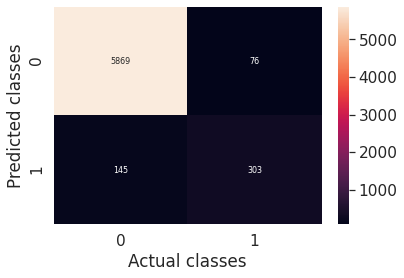

Fitting 2 folds for each of 168 candidates, totalling 336 fits
[CV] C=0.5, max_iter=50 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  C=0.5, max_iter=50, score=(train=0.732, test=0.518), total=   0.3s
[CV] C=0.5, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  C=0.5, max_iter=50, score=(train=0.733, test=0.534), total=   0.3s
[CV] C=0.5, max_iter=100 .............................................
[CV]  C=0.5, max_iter=100, score=(train=0.732, test=0.518), total=   0.3s
[CV] C=0.5, max_iter=100 .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV]  C=0.5, max_iter=100, score=(train=0.734, test=0.534), total=   0.4s
[CV] C=0.5, max_iter=150 .............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV]  C=0.5, max_iter=150, score=(train=0.732, test=0.518), total=   0.3s
[CV] C=0.5, max_iter=150 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s remaining:    0.0s


[CV]  C=0.5, max_iter=150, score=(train=0.734, test=0.534), total=   0.4s
[CV] C=0.5, max_iter=200 .............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.9s remaining:    0.0s


[CV]  C=0.5, max_iter=200, score=(train=0.732, test=0.518), total=   0.3s
[CV] C=0.5, max_iter=200 .............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.2s remaining:    0.0s


[CV]  C=0.5, max_iter=200, score=(train=0.734, test=0.534), total=   0.4s
[CV] C=0.5, max_iter=250 .............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.6s remaining:    0.0s


[CV]  C=0.5, max_iter=250, score=(train=0.732, test=0.518), total=   0.3s
[CV] C=0.5, max_iter=250 .............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.9s remaining:    0.0s


[CV]  C=0.5, max_iter=250, score=(train=0.734, test=0.534), total=   0.3s
[CV] C=0.5, max_iter=300 .............................................
[CV]  C=0.5, max_iter=300, score=(train=0.732, test=0.518), total=   0.3s
[CV] C=0.5, max_iter=300 .............................................
[CV]  C=0.5, max_iter=300, score=(train=0.734, test=0.534), total=   0.3s
[CV] C=0.5, max_iter=350 .............................................
[CV]  C=0.5, max_iter=350, score=(train=0.732, test=0.518), total=   0.3s
[CV] C=0.5, max_iter=350 .............................................
[CV]  C=0.5, max_iter=350, score=(train=0.734, test=0.534), total=   0.4s
[CV] C=0.5, max_iter=400 .............................................
[CV]  C=0.5, max_iter=400, score=(train=0.732, test=0.518), total=   0.3s
[CV] C=0.5, max_iter=400 .............................................
[CV]  C=0.5, max_iter=400, score=(train=0.734, test=0.534), total=   0.3s
[CV] C=1, max_iter=50 ..................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=50, score=(train=0.834, test=0.566), total=   0.3s
[CV] C=1, max_iter=50 ................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, max_iter=50, score=(train=0.845, test=0.570), total=   0.2s
[CV] C=1, max_iter=100 ...............................................
[CV]  C=1, max_iter=100, score=(train=0.834, test=0.566), total=   0.3s
[CV] C=1, max_iter=100 ...............................................
[CV]  C=1, max_iter=100, score=(train=0.844, test=0.571), total=   0.4s
[CV] C=1, max_iter=150 ...............................................
[CV]  C=1, max_iter=150, score=(train=0.834, test=0.566), total=   0.4s
[CV] C=1, max_iter=150 ...............................................
[CV]  C=1, max_iter=150, score=(train=0.844, test=0.571), total=   0.4s
[CV] C=1, max_iter=200 ...............................................
[CV]  C=1, max_iter=200, score=(train=0.834, test=0.566), total=   0.4s
[CV] C=1, max_iter=200 ...............................................
[CV]  C=1, max_iter=200, score=(train=0.844, test=0.571), total=   0.4s
[CV] C=1, max_iter=250 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=2, max_iter=50, score=(train=0.901, test=0.604), total=   0.3s
[CV] C=2, max_iter=50 ................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=2, max_iter=50, score=(train=0.914, test=0.599), total=   0.3s
[CV] C=2, max_iter=100 ...............................................
[CV]  C=2, max_iter=100, score=(train=0.901, test=0.603), total=   0.5s
[CV] C=2, max_iter=100 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=2, max_iter=100, score=(train=0.914, test=0.597), total=   0.5s
[CV] C=2, max_iter=150 ...............................................
[CV]  C=2, max_iter=150, score=(train=0.901, test=0.603), total=   0.5s
[CV] C=2, max_iter=150 ...............................................
[CV]  C=2, max_iter=150, score=(train=0.914, test=0.597), total=   0.5s
[CV] C=2, max_iter=200 ...............................................
[CV]  C=2, max_iter=200, score=(train=0.901, test=0.603), total=   0.4s
[CV] C=2, max_iter=200 ...............................................
[CV]  C=2, max_iter=200, score=(train=0.914, test=0.597), total=   0.5s
[CV] C=2, max_iter=250 ...............................................
[CV]  C=2, max_iter=250, score=(train=0.901, test=0.603), total=   0.5s
[CV] C=2, max_iter=250 ...............................................
[CV]  C=2, max_iter=250, score=(train=0.914, test=0.597), total=   0.5s
[CV] C=2, max_iter=300 ...............................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=4, max_iter=50, score=(train=0.953, test=0.622), total=   0.2s
[CV] C=4, max_iter=50 ................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=4, max_iter=50, score=(train=0.961, test=0.607), total=   0.2s
[CV] C=4, max_iter=100 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=4, max_iter=100, score=(train=0.953, test=0.617), total=   0.4s
[CV] C=4, max_iter=100 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=4, max_iter=100, score=(train=0.961, test=0.613), total=   0.5s
[CV] C=4, max_iter=150 ...............................................
[CV]  C=4, max_iter=150, score=(train=0.953, test=0.617), total=   0.7s
[CV] C=4, max_iter=150 ...............................................
[CV]  C=4, max_iter=150, score=(train=0.961, test=0.613), total=   0.6s
[CV] C=4, max_iter=200 ...............................................
[CV]  C=4, max_iter=200, score=(train=0.953, test=0.617), total=   0.7s
[CV] C=4, max_iter=200 ...............................................
[CV]  C=4, max_iter=200, score=(train=0.961, test=0.613), total=   0.6s
[CV] C=4, max_iter=250 ...............................................
[CV]  C=4, max_iter=250, score=(train=0.953, test=0.617), total=   0.6s
[CV] C=4, max_iter=250 ...............................................
[CV]  C=4, max_iter=250, score=(train=0.961, test=0.613), total=   0.5s
[CV] C=4, max_iter=300 ...............................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=50, score=(train=0.976, test=0.628), total=   0.2s
[CV] C=10, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=50, score=(train=0.985, test=0.623), total=   0.2s
[CV] C=10, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=100, score=(train=0.979, test=0.621), total=   0.4s
[CV] C=10, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=100, score=(train=0.986, test=0.616), total=   0.5s
[CV] C=10, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=150, score=(train=0.979, test=0.621), total=   0.6s
[CV] C=10, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=10, max_iter=150, score=(train=0.986, test=0.615), total=   0.6s
[CV] C=10, max_iter=200 ..............................................
[CV]  C=10, max_iter=200, score=(train=0.979, test=0.621), total=   0.6s
[CV] C=10, max_iter=200 ..............................................
[CV]  C=10, max_iter=200, score=(train=0.986, test=0.615), total=   0.7s
[CV] C=10, max_iter=250 ..............................................
[CV]  C=10, max_iter=250, score=(train=0.979, test=0.621), total=   0.6s
[CV] C=10, max_iter=250 ..............................................
[CV]  C=10, max_iter=250, score=(train=0.986, test=0.615), total=   0.6s
[CV] C=10, max_iter=300 ..............................................
[CV]  C=10, max_iter=300, score=(train=0.979, test=0.621), total=   0.6s
[CV] C=10, max_iter=300 ..............................................
[CV]  C=10, max_iter=300, score=(train=0.986, test=0.615), total=   0.7s
[CV] C=10, max_iter=350 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=50, score=(train=0.983, test=0.622), total=   0.2s
[CV] C=20, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=50, score=(train=0.992, test=0.622), total=   0.2s
[CV] C=20, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=100, score=(train=0.985, test=0.623), total=   0.5s
[CV] C=20, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=100, score=(train=0.991, test=0.610), total=   0.4s
[CV] C=20, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=150, score=(train=0.985, test=0.622), total=   0.7s
[CV] C=20, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=150, score=(train=0.991, test=0.611), total=   0.7s
[CV] C=20, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=20, max_iter=200, score=(train=0.985, test=0.621), total=   0.9s
[CV] C=20, max_iter=200 ..............................................
[CV]  C=20, max_iter=200, score=(train=0.991, test=0.611), total=   0.8s
[CV] C=20, max_iter=250 ..............................................
[CV]  C=20, max_iter=250, score=(train=0.985, test=0.621), total=   0.9s
[CV] C=20, max_iter=250 ..............................................
[CV]  C=20, max_iter=250, score=(train=0.991, test=0.611), total=   0.8s
[CV] C=20, max_iter=300 ..............................................
[CV]  C=20, max_iter=300, score=(train=0.985, test=0.621), total=   0.9s
[CV] C=20, max_iter=300 ..............................................
[CV]  C=20, max_iter=300, score=(train=0.991, test=0.611), total=   0.8s
[CV] C=20, max_iter=350 ..............................................
[CV]  C=20, max_iter=350, score=(train=0.985, test=0.621), total=   1.0s
[CV] C=20, max_iter=350 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=50, score=(train=0.987, test=0.624), total=   0.3s
[CV] C=30, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=50, score=(train=0.991, test=0.624), total=   0.2s
[CV] C=30, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=100, score=(train=0.989, test=0.619), total=   0.4s
[CV] C=30, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=100, score=(train=0.993, test=0.606), total=   0.5s
[CV] C=30, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=150, score=(train=0.989, test=0.618), total=   0.6s
[CV] C=30, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=150, score=(train=0.993, test=0.604), total=   0.7s
[CV] C=30, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=200, score=(train=0.989, test=0.618), total=   0.9s
[CV] C=30, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=30, max_iter=200, score=(train=0.993, test=0.605), total=   0.9s
[CV] C=30, max_iter=250 ..............................................
[CV]  C=30, max_iter=250, score=(train=0.989, test=0.618), total=   0.9s
[CV] C=30, max_iter=250 ..............................................
[CV]  C=30, max_iter=250, score=(train=0.993, test=0.605), total=   0.9s
[CV] C=30, max_iter=300 ..............................................
[CV]  C=30, max_iter=300, score=(train=0.989, test=0.618), total=   0.9s
[CV] C=30, max_iter=300 ..............................................
[CV]  C=30, max_iter=300, score=(train=0.993, test=0.605), total=   0.9s
[CV] C=30, max_iter=350 ..............................................
[CV]  C=30, max_iter=350, score=(train=0.989, test=0.618), total=   0.9s
[CV] C=30, max_iter=350 ..............................................
[CV]  C=30, max_iter=350, score=(train=0.993, test=0.605), total=   0.9s
[CV] C=30, max_iter=400 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=50, score=(train=0.988, test=0.625), total=   0.2s
[CV] C=40, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=50, score=(train=0.993, test=0.621), total=   0.2s
[CV] C=40, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=100, score=(train=0.991, test=0.611), total=   0.4s
[CV] C=40, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=100, score=(train=0.996, test=0.604), total=   0.4s
[CV] C=40, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=150, score=(train=0.991, test=0.611), total=   0.6s
[CV] C=40, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=150, score=(train=0.996, test=0.602), total=   0.6s
[CV] C=40, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=200, score=(train=0.991, test=0.612), total=   0.8s
[CV] C=40, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=40, max_iter=200, score=(train=0.996, test=0.602), total=   0.8s
[CV] C=40, max_iter=250 ..............................................
[CV]  C=40, max_iter=250, score=(train=0.991, test=0.612), total=   1.0s
[CV] C=40, max_iter=250 ..............................................
[CV]  C=40, max_iter=250, score=(train=0.996, test=0.602), total=   0.9s
[CV] C=40, max_iter=300 ..............................................
[CV]  C=40, max_iter=300, score=(train=0.991, test=0.612), total=   0.9s
[CV] C=40, max_iter=300 ..............................................
[CV]  C=40, max_iter=300, score=(train=0.996, test=0.602), total=   0.9s
[CV] C=40, max_iter=350 ..............................................
[CV]  C=40, max_iter=350, score=(train=0.991, test=0.612), total=   0.9s
[CV] C=40, max_iter=350 ..............................................
[CV]  C=40, max_iter=350, score=(train=0.996, test=0.602), total=   0.9s
[CV] C=40, max_iter=400 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=50, score=(train=0.989, test=0.619), total=   0.2s
[CV] C=50, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=50, score=(train=0.994, test=0.619), total=   0.2s
[CV] C=50, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=100, score=(train=0.991, test=0.608), total=   0.4s
[CV] C=50, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=100, score=(train=0.996, test=0.603), total=   0.4s
[CV] C=50, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=150, score=(train=0.991, test=0.608), total=   0.6s
[CV] C=50, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=150, score=(train=0.997, test=0.606), total=   0.6s
[CV] C=50, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=200, score=(train=0.991, test=0.607), total=   0.8s
[CV] C=50, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=200, score=(train=0.997, test=0.605), total=   0.8s
[CV] C=50, max_iter=250 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=50, max_iter=250, score=(train=0.991, test=0.606), total=   1.0s
[CV] C=50, max_iter=250 ..............................................
[CV]  C=50, max_iter=250, score=(train=0.997, test=0.605), total=   1.0s
[CV] C=50, max_iter=300 ..............................................
[CV]  C=50, max_iter=300, score=(train=0.991, test=0.606), total=   1.1s
[CV] C=50, max_iter=300 ..............................................
[CV]  C=50, max_iter=300, score=(train=0.997, test=0.605), total=   1.0s
[CV] C=50, max_iter=350 ..............................................
[CV]  C=50, max_iter=350, score=(train=0.991, test=0.606), total=   1.1s
[CV] C=50, max_iter=350 ..............................................
[CV]  C=50, max_iter=350, score=(train=0.997, test=0.605), total=   1.0s
[CV] C=50, max_iter=400 ..............................................
[CV]  C=50, max_iter=400, score=(train=0.991, test=0.606), total=   1.1s
[CV] C=50, max_iter=400 .......................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=50, score=(train=0.990, test=0.623), total=   0.2s
[CV] C=70, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=50, score=(train=0.996, test=0.617), total=   0.2s
[CV] C=70, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=100, score=(train=0.992, test=0.602), total=   0.4s
[CV] C=70, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=100, score=(train=0.997, test=0.599), total=   0.4s
[CV] C=70, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=150, score=(train=0.992, test=0.606), total=   0.6s
[CV] C=70, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=150, score=(train=0.997, test=0.595), total=   0.6s
[CV] C=70, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=200, score=(train=0.992, test=0.606), total=   0.8s
[CV] C=70, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=200, score=(train=0.997, test=0.597), total=   0.8s
[CV] C=70, max_iter=250 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=250, score=(train=0.992, test=0.606), total=   1.0s
[CV] C=70, max_iter=250 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=70, max_iter=250, score=(train=0.997, test=0.597), total=   1.0s
[CV] C=70, max_iter=300 ..............................................
[CV]  C=70, max_iter=300, score=(train=0.992, test=0.606), total=   1.1s
[CV] C=70, max_iter=300 ..............................................
[CV]  C=70, max_iter=300, score=(train=0.997, test=0.597), total=   1.0s
[CV] C=70, max_iter=350 ..............................................
[CV]  C=70, max_iter=350, score=(train=0.992, test=0.606), total=   1.1s
[CV] C=70, max_iter=350 ..............................................
[CV]  C=70, max_iter=350, score=(train=0.997, test=0.597), total=   1.0s
[CV] C=70, max_iter=400 ..............................................
[CV]  C=70, max_iter=400, score=(train=0.992, test=0.606), total=   1.1s
[CV] C=70, max_iter=400 ..............................................
[CV]  C=70, max_iter=400, score=(train=0.997, test=0.597), total=   1.0s
[CV] C=80, max_iter=50 ........................................

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=50, score=(train=0.990, test=0.624), total=   0.2s
[CV] C=80, max_iter=50 ...............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=50, score=(train=0.994, test=0.622), total=   0.2s
[CV] C=80, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=100, score=(train=0.992, test=0.608), total=   0.4s
[CV] C=80, max_iter=100 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=100, score=(train=0.998, test=0.600), total=   0.4s
[CV] C=80, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=150, score=(train=0.992, test=0.606), total=   0.6s
[CV] C=80, max_iter=150 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=150, score=(train=0.998, test=0.594), total=   0.6s
[CV] C=80, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=200, score=(train=0.992, test=0.604), total=   0.8s
[CV] C=80, max_iter=200 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=200, score=(train=0.998, test=0.596), total=   0.8s
[CV] C=80, max_iter=250 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=250, score=(train=0.992, test=0.603), total=   1.0s
[CV] C=80, max_iter=250 ..............................................
[CV]  C=80, max_iter=250, score=(train=0.998, test=0.595), total=   1.0s
[CV] C=80, max_iter=300 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=80, max_iter=300, score=(train=0.992, test=0.605), total=   1.2s
[CV] C=80, max_iter=300 ..............................................
[CV]  C=80, max_iter=300, score=(train=0.998, test=0.595), total=   1.0s
[CV] C=80, max_iter=350 ..............................................
[CV]  C=80, max_iter=350, score=(train=0.992, test=0.605), total=   1.2s
[CV] C=80, max_iter=350 ..............................................
[CV]  C=80, max_iter=350, score=(train=0.998, test=0.595), total=   1.0s
[CV] C=80, max_iter=400 ..............................................
[CV]  C=80, max_iter=400, score=(train=0.992, test=0.605), total=   1.2s
[CV] C=80, max_iter=400 ..............................................
[CV]  C=80, max_iter=400, score=(train=0.998, test=0.595), total=   1.0s
[CV] C=100, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=50, score=(train=0.989, test=0.628), total=   0.2s
[CV] C=100, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=50, score=(train=0.998, test=0.620), total=   0.2s
[CV] C=100, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=100, score=(train=0.993, test=0.607), total=   0.4s
[CV] C=100, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=100, score=(train=0.998, test=0.599), total=   0.4s
[CV] C=100, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=150, score=(train=0.993, test=0.596), total=   0.6s
[CV] C=100, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=150, score=(train=0.998, test=0.595), total=   0.6s
[CV] C=100, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=200, score=(train=0.993, test=0.597), total=   0.8s
[CV] C=100, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=200, score=(train=0.998, test=0.595), total=   0.8s
[CV] C=100, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=250, score=(train=0.993, test=0.597), total=   1.0s
[CV] C=100, max_iter=250 .............................................
[CV]  C=100, max_iter=250, score=(train=0.998, test=0.595), total=   0.9s
[CV] C=100, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=100, max_iter=300, score=(train=0.993, test=0.597), total=   1.2s
[CV] C=100, max_iter=300 .............................................
[CV]  C=100, max_iter=300, score=(train=0.998, test=0.595), total=   0.9s
[CV] C=100, max_iter=350 .............................................
[CV]  C=100, max_iter=350, score=(train=0.993, test=0.597), total=   1.2s
[CV] C=100, max_iter=350 .............................................
[CV]  C=100, max_iter=350, score=(train=0.998, test=0.595), total=   0.9s
[CV] C=100, max_iter=400 .............................................
[CV]  C=100, max_iter=400, score=(train=0.993, test=0.597), total=   1.3s
[CV] C=100, max_iter=400 .............................................
[CV]  C=100, max_iter=400, score=(train=0.998, test=0.595), total=   0.9s
[CV] C=130, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=50, score=(train=0.991, test=0.620), total=   0.2s
[CV] C=130, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=50, score=(train=0.997, test=0.618), total=   0.2s
[CV] C=130, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=100, score=(train=0.994, test=0.594), total=   0.4s
[CV] C=130, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=100, score=(train=0.999, test=0.602), total=   0.4s
[CV] C=130, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=150, score=(train=0.994, test=0.590), total=   0.6s
[CV] C=130, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=150, score=(train=0.999, test=0.597), total=   0.6s
[CV] C=130, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=200, score=(train=0.994, test=0.587), total=   0.8s
[CV] C=130, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=200, score=(train=0.999, test=0.596), total=   0.8s
[CV] C=130, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=250, score=(train=0.994, test=0.588), total=   1.0s
[CV] C=130, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=250, score=(train=0.999, test=0.596), total=   1.0s
[CV] C=130, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=130, max_iter=300, score=(train=0.994, test=0.588), total=   1.2s
[CV] C=130, max_iter=300 .............................................
[CV]  C=130, max_iter=300, score=(train=0.999, test=0.596), total=   1.0s
[CV] C=130, max_iter=350 .............................................
[CV]  C=130, max_iter=350, score=(train=0.994, test=0.588), total=   1.2s
[CV] C=130, max_iter=350 .............................................
[CV]  C=130, max_iter=350, score=(train=0.999, test=0.596), total=   1.0s
[CV] C=130, max_iter=400 .............................................
[CV]  C=130, max_iter=400, score=(train=0.994, test=0.588), total=   1.2s
[CV] C=130, max_iter=400 .............................................
[CV]  C=130, max_iter=400, score=(train=0.999, test=0.596), total=   1.1s
[CV] C=160, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=50, score=(train=0.991, test=0.622), total=   0.2s
[CV] C=160, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=50, score=(train=0.998, test=0.611), total=   0.2s
[CV] C=160, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=100, score=(train=0.994, test=0.594), total=   0.4s
[CV] C=160, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=100, score=(train=0.999, test=0.598), total=   0.4s
[CV] C=160, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=150, score=(train=0.994, test=0.588), total=   0.6s
[CV] C=160, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=150, score=(train=0.999, test=0.593), total=   0.6s
[CV] C=160, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=200, score=(train=0.994, test=0.583), total=   0.8s
[CV] C=160, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=200, score=(train=0.999, test=0.593), total=   0.8s
[CV] C=160, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=250, score=(train=0.994, test=0.583), total=   1.0s
[CV] C=160, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=250, score=(train=0.999, test=0.595), total=   1.0s
[CV] C=160, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=160, max_iter=300, score=(train=0.994, test=0.582), total=   1.2s
[CV] C=160, max_iter=300 .............................................
[CV]  C=160, max_iter=300, score=(train=0.999, test=0.595), total=   1.1s
[CV] C=160, max_iter=350 .............................................
[CV]  C=160, max_iter=350, score=(train=0.994, test=0.582), total=   1.4s
[CV] C=160, max_iter=350 .............................................
[CV]  C=160, max_iter=350, score=(train=0.999, test=0.595), total=   1.1s
[CV] C=160, max_iter=400 .............................................
[CV]  C=160, max_iter=400, score=(train=0.994, test=0.582), total=   1.4s
[CV] C=160, max_iter=400 .............................................
[CV]  C=160, max_iter=400, score=(train=0.999, test=0.595), total=   1.1s
[CV] C=180, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=50, score=(train=0.993, test=0.617), total=   0.2s
[CV] C=180, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=50, score=(train=0.999, test=0.617), total=   0.2s
[CV] C=180, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=100, score=(train=0.994, test=0.590), total=   0.4s
[CV] C=180, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=100, score=(train=0.999, test=0.598), total=   0.4s
[CV] C=180, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=150, score=(train=0.994, test=0.585), total=   0.6s
[CV] C=180, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=150, score=(train=0.999, test=0.593), total=   0.6s
[CV] C=180, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=200, score=(train=0.994, test=0.582), total=   0.8s
[CV] C=180, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=200, score=(train=0.999, test=0.592), total=   0.8s
[CV] C=180, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=250, score=(train=0.994, test=0.582), total=   1.0s
[CV] C=180, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=250, score=(train=0.999, test=0.592), total=   1.0s
[CV] C=180, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=180, max_iter=300, score=(train=0.994, test=0.581), total=   1.2s
[CV] C=180, max_iter=300 .............................................
[CV]  C=180, max_iter=300, score=(train=0.999, test=0.592), total=   1.0s
[CV] C=180, max_iter=350 .............................................
[CV]  C=180, max_iter=350, score=(train=0.994, test=0.581), total=   1.3s
[CV] C=180, max_iter=350 .............................................
[CV]  C=180, max_iter=350, score=(train=0.999, test=0.592), total=   1.0s
[CV] C=180, max_iter=400 .............................................
[CV]  C=180, max_iter=400, score=(train=0.994, test=0.581), total=   1.3s
[CV] C=180, max_iter=400 .............................................
[CV]  C=180, max_iter=400, score=(train=0.999, test=0.592), total=   1.0s
[CV] C=190, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=50, score=(train=0.993, test=0.623), total=   0.2s
[CV] C=190, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=50, score=(train=0.997, test=0.613), total=   0.2s
[CV] C=190, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=100, score=(train=0.994, test=0.591), total=   0.4s
[CV] C=190, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=100, score=(train=0.999, test=0.602), total=   0.4s
[CV] C=190, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=150, score=(train=0.994, test=0.585), total=   0.6s
[CV] C=190, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=150, score=(train=0.999, test=0.596), total=   0.6s
[CV] C=190, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=200, score=(train=0.994, test=0.581), total=   0.8s
[CV] C=190, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=200, score=(train=0.999, test=0.595), total=   0.8s
[CV] C=190, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=250, score=(train=0.994, test=0.581), total=   1.0s
[CV] C=190, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=250, score=(train=0.999, test=0.593), total=   1.0s
[CV] C=190, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=300, score=(train=0.994, test=0.580), total=   1.2s
[CV] C=190, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=300, score=(train=0.999, test=0.594), total=   1.2s
[CV] C=190, max_iter=350 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=350, score=(train=0.994, test=0.580), total=   1.4s
[CV] C=190, max_iter=350 .............................................
[CV]  C=190, max_iter=350, score=(train=0.999, test=0.594), total=   1.2s
[CV] C=190, max_iter=400 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=190, max_iter=400, score=(train=0.994, test=0.580), total=   1.5s
[CV] C=190, max_iter=400 .............................................
[CV]  C=190, max_iter=400, score=(train=0.999, test=0.594), total=   1.2s
[CV] C=200, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=50, score=(train=0.992, test=0.628), total=   0.2s
[CV] C=200, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=50, score=(train=0.998, test=0.615), total=   0.2s
[CV] C=200, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=100, score=(train=0.994, test=0.597), total=   0.4s
[CV] C=200, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=100, score=(train=0.999, test=0.597), total=   0.4s
[CV] C=200, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=150, score=(train=0.994, test=0.584), total=   0.6s
[CV] C=200, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=150, score=(train=0.999, test=0.593), total=   0.6s
[CV] C=200, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=200, score=(train=0.994, test=0.580), total=   0.8s
[CV] C=200, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=200, score=(train=0.999, test=0.594), total=   0.8s
[CV] C=200, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=250, score=(train=0.994, test=0.579), total=   1.0s
[CV] C=200, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=250, score=(train=0.999, test=0.594), total=   1.0s
[CV] C=200, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=300, score=(train=0.994, test=0.578), total=   1.2s
[CV] C=200, max_iter=300 .............................................
[CV]  C=200, max_iter=300, score=(train=0.999, test=0.594), total=   1.1s
[CV] C=200, max_iter=350 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=200, max_iter=350, score=(train=0.994, test=0.578), total=   1.3s
[CV] C=200, max_iter=350 .............................................
[CV]  C=200, max_iter=350, score=(train=0.999, test=0.594), total=   1.1s
[CV] C=200, max_iter=400 .............................................
[CV]  C=200, max_iter=400, score=(train=0.994, test=0.578), total=   1.5s
[CV] C=200, max_iter=400 .............................................
[CV]  C=200, max_iter=400, score=(train=0.999, test=0.594), total=   1.1s
[CV] C=250, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=50, score=(train=0.993, test=0.621), total=   0.2s
[CV] C=250, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=50, score=(train=0.998, test=0.620), total=   0.2s
[CV] C=250, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=100, score=(train=0.994, test=0.589), total=   0.4s
[CV] C=250, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=100, score=(train=0.999, test=0.598), total=   0.4s
[CV] C=250, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=150, score=(train=0.994, test=0.576), total=   0.6s
[CV] C=250, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=150, score=(train=0.999, test=0.591), total=   0.6s
[CV] C=250, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=200, score=(train=0.994, test=0.571), total=   0.8s
[CV] C=250, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=200, score=(train=0.999, test=0.591), total=   0.8s
[CV] C=250, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=250, score=(train=0.994, test=0.572), total=   1.0s
[CV] C=250, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=250, score=(train=0.999, test=0.592), total=   1.0s
[CV] C=250, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=300, score=(train=0.994, test=0.572), total=   1.2s
[CV] C=250, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=300, score=(train=0.999, test=0.592), total=   1.2s
[CV] C=250, max_iter=350 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=350, score=(train=0.994, test=0.572), total=   1.3s
[CV] C=250, max_iter=350 .............................................
[CV]  C=250, max_iter=350, score=(train=0.999, test=0.592), total=   1.2s
[CV] C=250, max_iter=400 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=250, max_iter=400, score=(train=0.994, test=0.572), total=   1.5s
[CV] C=250, max_iter=400 .............................................
[CV]  C=250, max_iter=400, score=(train=0.999, test=0.592), total=   1.2s
[CV] C=300, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=50, score=(train=0.992, test=0.619), total=   0.2s
[CV] C=300, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=50, score=(train=0.999, test=0.613), total=   0.2s
[CV] C=300, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=100, score=(train=0.995, test=0.591), total=   0.4s
[CV] C=300, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=100, score=(train=0.999, test=0.596), total=   0.4s
[CV] C=300, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=150, score=(train=0.996, test=0.574), total=   0.6s
[CV] C=300, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=150, score=(train=0.999, test=0.592), total=   0.6s
[CV] C=300, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=200, score=(train=0.997, test=0.569), total=   0.8s
[CV] C=300, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=200, score=(train=0.999, test=0.592), total=   0.8s
[CV] C=300, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=250, score=(train=0.997, test=0.570), total=   1.0s
[CV] C=300, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=250, score=(train=0.999, test=0.591), total=   1.0s
[CV] C=300, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=300, score=(train=0.997, test=0.569), total=   1.2s
[CV] C=300, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=300, score=(train=0.999, test=0.591), total=   1.2s
[CV] C=300, max_iter=350 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=350, score=(train=0.997, test=0.569), total=   1.4s
[CV] C=300, max_iter=350 .............................................
[CV]  C=300, max_iter=350, score=(train=0.999, test=0.591), total=   1.3s
[CV] C=300, max_iter=400 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=300, max_iter=400, score=(train=0.997, test=0.569), total=   1.5s
[CV] C=300, max_iter=400 .............................................
[CV]  C=300, max_iter=400, score=(train=0.999, test=0.591), total=   1.3s
[CV] C=350, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=50, score=(train=0.993, test=0.611), total=   0.2s
[CV] C=350, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=50, score=(train=0.999, test=0.608), total=   0.2s
[CV] C=350, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=100, score=(train=0.996, test=0.589), total=   0.4s
[CV] C=350, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=100, score=(train=0.999, test=0.595), total=   0.4s
[CV] C=350, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=150, score=(train=0.997, test=0.574), total=   0.6s
[CV] C=350, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=150, score=(train=0.999, test=0.593), total=   0.6s
[CV] C=350, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=200, score=(train=0.997, test=0.567), total=   0.8s
[CV] C=350, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=200, score=(train=0.999, test=0.593), total=   0.8s
[CV] C=350, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=250, score=(train=0.997, test=0.569), total=   1.0s
[CV] C=350, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=250, score=(train=0.999, test=0.591), total=   1.0s
[CV] C=350, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=300, score=(train=0.997, test=0.569), total=   1.2s
[CV] C=350, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=300, score=(train=0.999, test=0.591), total=   1.2s
[CV] C=350, max_iter=350 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=350, score=(train=0.997, test=0.569), total=   1.4s
[CV] C=350, max_iter=350 .............................................
[CV]  C=350, max_iter=350, score=(train=0.999, test=0.591), total=   1.2s
[CV] C=350, max_iter=400 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=350, max_iter=400, score=(train=0.997, test=0.569), total=   1.6s
[CV] C=350, max_iter=400 .............................................
[CV]  C=350, max_iter=400, score=(train=0.999, test=0.591), total=   1.2s
[CV] C=400, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=50, score=(train=0.993, test=0.618), total=   0.2s
[CV] C=400, max_iter=50 ..............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=50, score=(train=0.999, test=0.619), total=   0.2s
[CV] C=400, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=100, score=(train=0.996, test=0.591), total=   0.4s
[CV] C=400, max_iter=100 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=100, score=(train=0.999, test=0.596), total=   0.4s
[CV] C=400, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=150, score=(train=0.997, test=0.572), total=   0.6s
[CV] C=400, max_iter=150 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=150, score=(train=0.999, test=0.592), total=   0.6s
[CV] C=400, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=200, score=(train=0.997, test=0.568), total=   0.8s
[CV] C=400, max_iter=200 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=200, score=(train=0.999, test=0.592), total=   0.8s
[CV] C=400, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=250, score=(train=0.997, test=0.568), total=   1.0s
[CV] C=400, max_iter=250 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=250, score=(train=0.999, test=0.592), total=   1.0s
[CV] C=400, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=300, score=(train=0.997, test=0.569), total=   1.2s
[CV] C=400, max_iter=300 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=300, score=(train=0.999, test=0.592), total=   1.2s
[CV] C=400, max_iter=350 .............................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=400, max_iter=350, score=(train=0.997, test=0.568), total=   1.4s
[CV] C=400, max_iter=350 .............................................
[CV]  C=400, max_iter=350, score=(train=0.999, test=0.592), total=   1.2s
[CV] C=400, max_iter=400 .............................................
[CV]  C=400, max_iter=400, score=(train=0.997, test=0.568), total=   1.5s
[CV] C=400, max_iter=400 .............................................
[CV]  C=400, max_iter=400, score=(train=0.999, test=0.592), total=   1.2s


[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:  4.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


best parameters: {'C': 10, 'max_iter': 50}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


for logistic-regression bow


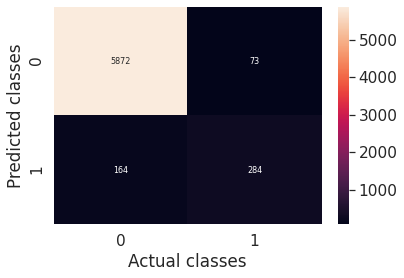

+------------------+------------------------------+--------------------+--------------------+
|      Model       |          best_param          |      F1_score      |      Accuracy      |
+------------------+------------------------------+--------------------+--------------------+
| linear-svm-tfidf | {'C': 2, 'kernel': 'linear'} | 0.7488151658767774 | 0.9668387298607852 |
|  linear-svm-bow  | {'C': 1, 'kernel': 'linear'} | 0.7100737100737101 | 0.9630846238072892 |
|     LR-tfidf     | {'C': 400, 'max_iter': 100}  | 0.7327690447400241 | 0.9654309400907243 |
|     LR-tfidf     |  {'C': 10, 'max_iter': 50}   | 0.7055900621118012 | 0.9629282027217269 |
+------------------+------------------------------+--------------------+--------------------+


In [0]:
grid = {"C":[0.5,1,2,4,10,20,30,40,50,70,80,100,130,160,180,190,200,250,300,350,400],"max_iter":[50,100,150,200,250,300,350,400]}

#tfidf
clf_LR = LogisticRegression(random_state=345)
rf_cv=gridsearch(X_train_tfidf,y_train,clf_LR,grid,scorer)
print("..tfidf done")
params=rf_cv.best_params_
clf_LR = LogisticRegression(random_state=345,C=params['C'],max_iter=params['max_iter']).fit(X_train_tfidf,y_train)
y_pred = clf_LR.predict(X_test_tfidf)
print("for logistic-regression tfidf")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(['LR-tfidf',rf_cv.best_params_,f1_score(y_test,y_pred),clf_LR.score(X_test_tfidf,y_test)])

#bow
clf_LR = LogisticRegression(random_state=345)
rf_cv=gridsearch(X_train_bow,y_train,clf_LR,grid,scorer)
params=rf_cv.best_params_
clf_LR = LogisticRegression(random_state=345,C=params['C'],max_iter=params['max_iter']).fit(X_train_bow,y_train)
y_pred = clf_LR.predict(X_test_bow)
print("for logistic-regression bow")
plt_confusion_matrix(y_test,y_pred)
table.add_row(['LR-tfidf',rf_cv.best_params_,f1_score(y_test,y_pred),clf_LR.score(X_test_bow,y_test)])
print(table)

###`random forest`

In [0]:
grid={"n_estimators":[1,2,4,5,10,20,40, 50,60,70,80,100, 150, 200, 300, 500, 1000], "max_depth":[None,2, 3, 4, 5, 6, 7, 8, 9, 10]}

#tfidf
clf_random_forest = RandomForestClassifier(random_state=345)
rf_cv=gridsearch(X_train_tfidf,y_train,clf_random_forest,grid,scorer)
params=rf_cv.best_params_
clf_random_forest = RandomForestClassifier(random_state=345,n_estimators = params['n_estimators'],max_depth=params['max_depth']).fit(X_train_tfidf,y_train)


Fitting 2 folds for each of 170 candidates, totalling 340 fits
[CV] max_depth=None, n_estimators=1 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, n_estimators=1, score=(train=0.825, test=0.413), total=   2.2s
[CV] max_depth=None, n_estimators=1 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  max_depth=None, n_estimators=1, score=(train=0.815, test=0.394), total=   2.2s
[CV] max_depth=None, n_estimators=2 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  max_depth=None, n_estimators=2, score=(train=0.735, test=0.329), total=   4.5s
[CV] max_depth=None, n_estimators=2 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.0s remaining:    0.0s


[CV]  max_depth=None, n_estimators=2, score=(train=0.707, test=0.306), total=   4.5s
[CV] max_depth=None, n_estimators=4 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.6s remaining:    0.0s


[CV]  max_depth=None, n_estimators=4, score=(train=0.831, test=0.360), total=   9.0s
[CV] max_depth=None, n_estimators=4 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.7s remaining:    0.0s


[CV]  max_depth=None, n_estimators=4, score=(train=0.826, test=0.327), total=   8.9s
[CV] max_depth=None, n_estimators=5 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.7s remaining:    0.0s


[CV]  max_depth=None, n_estimators=5, score=(train=0.921, test=0.423), total=  11.4s
[CV] max_depth=None, n_estimators=5 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   43.2s remaining:    0.0s


[CV]  max_depth=None, n_estimators=5, score=(train=0.922, test=0.391), total=  11.1s
[CV] max_depth=None, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   54.5s remaining:    0.0s


[CV]  max_depth=None, n_estimators=10, score=(train=0.926, test=0.382), total=  22.6s
[CV] max_depth=None, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s


[CV]  max_depth=None, n_estimators=10, score=(train=0.936, test=0.384), total=  22.5s
[CV] max_depth=None, n_estimators=20 .................................
[CV]  max_depth=None, n_estimators=20, score=(train=0.971, test=0.385), total=  43.3s
[CV] max_depth=None, n_estimators=20 .................................
[CV]  max_depth=None, n_estimators=20, score=(train=0.976, test=0.387), total=  43.7s
[CV] max_depth=None, n_estimators=40 .................................
[CV]  max_depth=None, n_estimators=40, score=(train=0.992, test=0.382), total= 1.4min
[CV] max_depth=None, n_estimators=40 .................................
[CV]  max_depth=None, n_estimators=40, score=(train=0.992, test=0.398), total= 1.5min
[CV] max_depth=None, n_estimators=50 .................................
[CV]  max_depth=None, n_estimators=50, score=(train=0.995, test=0.383), total= 1.8min
[CV] max_depth=None, n_estimators=50 .................................
[CV]  max_depth=None, n_estimators=50, score=(train=0.994,

[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed: 217.6min finished


best parameters: {'max_depth': None, 'n_estimators': 5}


for random forest tfidf


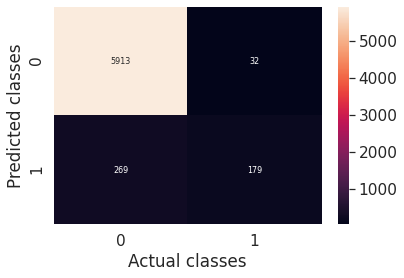

In [0]:
clf_random_forest = RandomForestClassifier(random_state=345,n_estimators = 5,max_depth=None).fit(X_train_tfidf,y_train)
y_pred = clf_random_forest.predict(X_test_tfidf)
print("for random forest tfidf")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(['RF-tfidf',{'max_depth': None, 'n_estimators': 5},f1_score(y_test,y_pred),clf_random_forest.score(X_test_tfidf,y_test)])


Fitting 2 folds for each of 170 candidates, totalling 340 fits
[CV] max_depth=None, n_estimators=1 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, n_estimators=1, score=(train=0.811, test=0.491), total=   0.3s
[CV] max_depth=None, n_estimators=1 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, n_estimators=1, score=(train=0.821, test=0.494), total=   0.2s
[CV] max_depth=None, n_estimators=2 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=None, n_estimators=2, score=(train=0.787, test=0.424), total=   0.5s
[CV] max_depth=None, n_estimators=2 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=None, n_estimators=2, score=(train=0.788, test=0.450), total=   0.5s
[CV] max_depth=None, n_estimators=4 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s


[CV]  max_depth=None, n_estimators=4, score=(train=0.883, test=0.481), total=   0.9s
[CV] max_depth=None, n_estimators=4 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s remaining:    0.0s


[CV]  max_depth=None, n_estimators=4, score=(train=0.884, test=0.524), total=   0.9s
[CV] max_depth=None, n_estimators=5 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=None, n_estimators=5, score=(train=0.943, test=0.525), total=   1.1s
[CV] max_depth=None, n_estimators=5 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.6s remaining:    0.0s


[CV]  max_depth=None, n_estimators=5, score=(train=0.946, test=0.583), total=   1.1s
[CV] max_depth=None, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.8s remaining:    0.0s


[CV]  max_depth=None, n_estimators=10, score=(train=0.955, test=0.545), total=   2.2s
[CV] max_depth=None, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.1s remaining:    0.0s


[CV]  max_depth=None, n_estimators=10, score=(train=0.966, test=0.579), total=   2.2s
[CV] max_depth=None, n_estimators=20 .................................
[CV]  max_depth=None, n_estimators=20, score=(train=0.984, test=0.558), total=   4.5s
[CV] max_depth=None, n_estimators=20 .................................
[CV]  max_depth=None, n_estimators=20, score=(train=0.988, test=0.598), total=   4.5s
[CV] max_depth=None, n_estimators=40 .................................
[CV]  max_depth=None, n_estimators=40, score=(train=0.998, test=0.569), total=   9.1s
[CV] max_depth=None, n_estimators=40 .................................
[CV]  max_depth=None, n_estimators=40, score=(train=0.997, test=0.597), total=   9.1s
[CV] max_depth=None, n_estimators=50 .................................
[CV]  max_depth=None, n_estimators=50, score=(train=0.998, test=0.561), total=  11.4s
[CV] max_depth=None, n_estimators=50 .................................
[CV]  max_depth=None, n_estimators=50, score=(train=0.998,

[Parallel(n_jobs=1)]: Done 340 out of 340 | elapsed: 27.2min finished


best parameters: {'max_depth': None, 'n_estimators': 1000}
for random forest bow


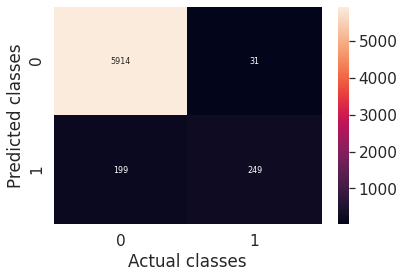

+----------+-------------------------------------------+--------------------+--------------------+
|  Model   |                 best_param                |      F1_score      |      Accuracy      |
+----------+-------------------------------------------+--------------------+--------------------+
| RF-tfidf |   {'max_depth': None, 'n_estimators': 5}  | 0.5432473444613051 | 0.9529172532457375 |
|  RF-bow  | {'max_depth': None, 'n_estimators': 1000} | 0.6840659340659341 | 0.9640231503206632 |
+----------+-------------------------------------------+--------------------+--------------------+


In [0]:
grid={"n_estimators":[1,2,4,5,10,20,40, 50,60,70,80,100, 150, 200, 300, 500, 1000], "max_depth":[None,2, 3, 4, 5, 6, 7, 8, 9, 10]}
#bow
clf_random_forest = RandomForestClassifier(random_state=345)
rf_cv=gridsearch(X_train_bow,y_train,clf_random_forest,grid,scorer)
params=rf_cv.best_params_
clf_random_forest = RandomForestClassifier(random_state=345,n_estimators = params['n_estimators'],max_depth=params['max_depth']).fit(X_train_bow,y_train)
y_pred = clf_random_forest.predict(X_test_bow)
print("for random forest bow")
plt_confusion_matrix(y_test,y_pred) 
table.add_row(['RF-bow',rf_cv.best_params_,f1_score(y_test,y_pred),clf_random_forest.score(X_test_bow,y_test)])
print(table)

#Summary

In [0]:
table = PrettyTable() 
table.field_names = ['Model','F1_score','Accuracy']
table.add_row(['linear-svm-tfidf',0.463245492371706,0.9515705168314353])
table.add_row(['linear-svm-bow',0.4693042291950887,0.9535727693655363])
table.add_row(['LR-tfidf',0.28483920367534454,0.941559254160931])
table.add_row(['LR-bow',0.6383928571428571,0.9594543861844576])
table.add_row(['RF-tfidf',0.5380577427821522,0.955950444249781])
table.add_row(['RF-bow',0.6159420289855072,0.9602052308847453])
print(table)

table = PrettyTable() 
table.field_names = ['Model','best_param','F1_score','Accuracy']

table.add_row(['linear-svm-tfidf',{'C': 2, 'kernel': 'linear'},0.7182662538699691,0.965836566136904])
table.add_row(['linear-svm-bow',{'C': 1, 'kernel': 'linear'},0.6596638655462185,0.9594543861844576])
table.add_row(['LR-tfidf',{'C': 400, 'max_iter': 50},0.700836820083682,0.964209735952947])
table.add_row(['LR-bow',{'C': 20, 'max_iter': 50},0.6805845511482254,0.961706920285321])
table.add_row(['RF-tfidf',{'max_depth': None, 'n_estimators': 1},0.39955604883462814,0.9322988361907145])
table.add_row(['RF-bow',{'max_depth': None, 'n_estimators': 150},0.6631578947368422,0.9599549493179828])

print(table)

+------------------+---------------------+--------------------+
|      Model       |       F1_score      |      Accuracy      |
+------------------+---------------------+--------------------+
| linear-svm-tfidf |  0.463245492371706  | 0.9515705168314353 |
|  linear-svm-bow  |  0.4693042291950887 | 0.9535727693655363 |
|     LR-tfidf     | 0.28483920367534454 | 0.941559254160931  |
|      LR-bow      |  0.6383928571428571 | 0.9594543861844576 |
|     RF-tfidf     |  0.5380577427821522 | 0.955950444249781  |
|      RF-bow      |  0.6159420289855072 | 0.9602052308847453 |
+------------------+---------------------+--------------------+
+------------------+------------------------------------------+---------------------+--------------------+
|      Model       |                best_param                |       F1_score      |      Accuracy      |
+------------------+------------------------------------------+---------------------+--------------------+
| linear-svm-tfidf |       {'C': 2, 'ke